In [1]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
from torch.autograd import Variable
import argparse
import matplotlib.pyplot as plt

In [2]:
batch_size = 64

In [3]:
train_dataset = datasets.MNIST(root = './mnist_data/',
                              train = True,
                              transform=transforms.ToTensor())

In [4]:
test_dataset = datasets.MNIST(root = './mnist_data/',
                              train = False,
                              transform=transforms.ToTensor())

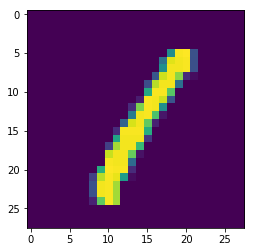

In [5]:
plt.imshow(train_dataset[3][0][0].numpy())
plt.show()

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [7]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

In [8]:
class CNN(torch.nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)
        self.mp = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(320, 10)
        
    def forward(self, x):
        in_size = x.size(0)
        x = torch.nn.functional.relu(self.mp(self.conv1(x)))
        x = torch.nn.functional.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)
        x = self.fc(x)
        return torch.nn.functional.log_softmax(x)

In [9]:
model = CNN()

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [11]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += torch.nn.functional.nll_loss(output, target, size_average=False).data[0]
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.277719
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.793278
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.439368
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.290818
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.293974
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.269227
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.432867
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.243745
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.105562
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.391991

Test set: Average loss: 0.1980, Accuracy: 9408/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.203180
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.181758
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.105834
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.061727
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.201929
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.123346
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.083959
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.222035
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.175176
T

In [ ]:
plt.imshow(test_dataset[1][0][0].numpy())
plt.show()

In [ ]:
test_dataset[1][1]